# U.S. Medical Insurance Costs

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Scoping your project

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_age = df['age'].dtype
print(df_age)

int64


### Task #1: Let's calculate the average age of patients here

##### You can find the average age of the patients in the dataset by using the .mean() function on the 'age' column.

In [7]:
average_age = df['age'].mean().astype(int)
print(average_age)

39


In [8]:
print("Average age of patients is:", average_age, "years.")

Average age of patients is: 39 years.


### Task #2: To Analyze where a majority of the individuals are from.

*To analyze where a majority of the individuals in the dataset are from, you can examine the 'region' column and count the occurrences of each region. You can use the value_counts() method to do this.*

In [9]:
region_counts = df['region'].value_counts()
print("Region Distribution:")
print(region_counts)

Region Distribution:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


#### Therefore, from the above results we can see that majority of individuals are from "Southeast Region" with a count of 364

### Task #3: Look at the different costs between smokers vs. non-smokers.

#### I'll be using two methods to do this.

In [10]:
# Group the data by the 'smoker' column and calculate the mean charges for each group
charges_by_smoker = df.groupby('smoker')['charges'].mean()

print(charges_by_smoker)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [11]:
# Calculate the average charges for smokers.
smokers_charges = df[df['smoker'] == 'yes']['charges'].mean()

# Calculate the average charges for non-smokers.
non_smokers_charges = df[df['smoker'] == 'no']['charges'].mean()

# Print the average charges for smokers and non-smokers with formatting.
print("Average Charges for Smokers: ${:.2f}".format(smokers_charges))
print("Average Charges for Non-Smokers: ${:.2f}".format(non_smokers_charges))

Average Charges for Smokers: $32050.23
Average Charges for Non-Smokers: $8434.27


### Task #4: Figure out what the average age is for someone who has at least one child in this dataset.

In [12]:
# Calculate the average age for individuals with at least one child (children count greater than or equal to 1).
average_age_with_one_child = df[df['children'] >= 1]['age'].mean()

# Format the calculated average age with one decimal place.
formatted_average_age = "{:.1f}".format(average_age_with_one_child)

# Print the formatted average age for individuals with at least one child.
print("Average Age for Someone with at Least One Child:", formatted_average_age, "years")

Average Age for Someone with at Least One Child: 39.8 years


### Task #5: Average Insurance Charges by Age Group: To analyze how insurance charges vary with different age groups. You can group individuals into age brackets and calculate the average insurance charges for each group.

In [13]:
# Step 1: Define age groups

# Define age bins and corresponding labels.
bins = [0, 25, 45, 65]
labels = ['young', 'middle-aged', 'senior']

# Create a new 'age_group' column using the `cut` function by categorizing 'age' using the defined bins and labels.
# In this example, we create 4 age groups: 'young', 'middle-aged', and 'senior'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 2: Calculate the average insurance charges for each age group
average_charges_by_age = df.groupby('age_group')['charges'].mean()

# Step 3: Display the results
print("Average Insurance Charges by Age Group:")
print(average_charges_by_age)


Average Insurance Charges by Age Group:
age_group
young           9087.015807
middle-aged    11983.052259
senior         17200.428704
Name: charges, dtype: float64


#### *The output tells us how average insurance charges vary across different age groups. It appears that, on average, insurance charges tend to increase as individuals get older, with the 'senior' age group having the highest average charges.*

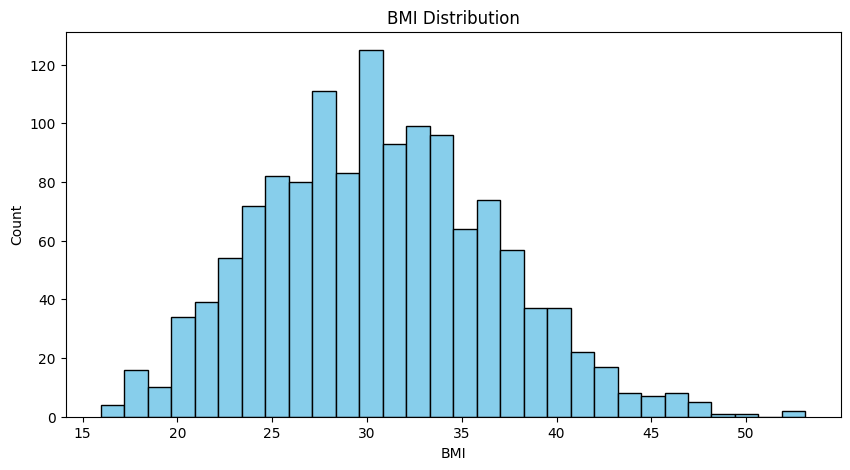

In [14]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt

# Step 2: Analyze the distribution of BMI
# You can create a histogram to visualize the distribution
plt.figure(figsize=(10, 5))
plt.hist(df['bmi'], bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

This shows a histogram of the distribution of BMI (Body Mass Index) in a population. The BMI is calculated by dividing a person's weight in kilograms by their height in meters squared. It is a measure of body fatness that is used to classify people as underweight, normal weight, overweight, or obese.

The histogram shows that the distribution of BMI is bell-shaped, with the majority of people having a BMI between 20 and 25. This is considered to be a healthy weight range. A smaller number of people have a BMI below 18.5 (underweight) or above 25 (overweight or obese).

The specific distribution of BMI will vary depending on the population being studied. For example, the distribution of BMI in the United States is different from the distribution of BMI in other countries. However, the general bell-shaped distribution is the same for all populations.

Here is a more detailed explanation of the different BMI categories:

* Underweight (BMI < 18.5): People who are underweight may be at risk for malnutrition and other health problems.
* Normal weight (BMI 18.5-24.9): People who have a normal weight are at a lower risk for developing chronic diseases such as heart disease, stroke, and type 2 diabetes.
* Overweight (BMI 25-29.9): People who are overweight are at an increased risk for developing chronic diseases.
* Obese (BMI 30 or higher): People who are obese are at a high risk for developing chronic diseases.

It is important to note that BMI is just one measure of body fatness. It does not take into account muscle mass, bone density, or body composition. Therefore, it is not always a reliable indicator of a person's overall health.

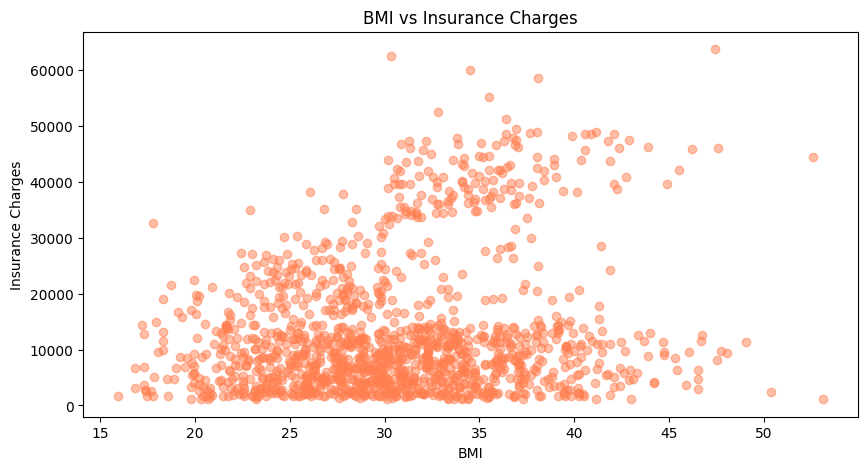

In [15]:
# Step 3: Analyze the impact of BMI on insurance charges
# You can use a scatter plot to visualize the relationship
plt.figure(figsize=(10, 5))
plt.scatter(df['bmi'], df['charges'], color='coral', alpha=0.5)
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

This shows a scatter plot of BMI vs. insurance charges. The scatter plot shows that there is a positive correlation between BMI and insurance charges, meaning that people with higher BMIs tend to pay higher insurance premiums. This is because people with higher BMIs are at a higher risk of developing chronic diseases, which are more expensive to treat.

The scatter plot also shows that there is a lot of variation in insurance charges for people with the same BMI. This is because insurance companies also consider other factors when setting premiums, such as age, sex, smoking status, and medical history.

Overall, the scatter plot suggests that people with higher BMIs should expect to pay higher insurance premiums. However, the exact amount of the premium will vary depending on a number of other factors.

Here are some additional observations from the scatter plot:

* The scatter plot is not evenly distributed. There are more data points at lower BMI and insurance charge levels, and fewer data points at higher BMI and insurance charge levels. This suggests that most people have a healthy BMI and pay moderate insurance premiums.
* There is a small cluster of data points at the top right corner of the scatter plot. These data points represent people with very high BMIs and very high insurance charges. These people are likely to be at a very high risk of developing chronic diseases, and their insurance premiums reflect that risk.

It is important to note that the scatter plot only shows a correlation between BMI and insurance charges. It does not prove that BMI causes insurance charges to increase. It is possible that other factors, such as age, sex, smoking status, and medical history, are causing both BMI and insurance charges to increase.

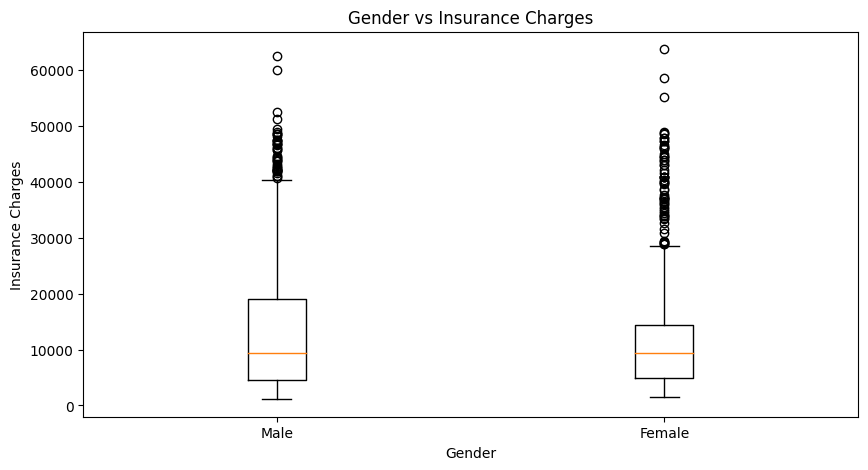

In [16]:
# Analyze the impact of gender on insurance charges
# You can use a box plot or violin plot to visualize the relationship
plt.figure(figsize=(10, 5))
plt.title('Gender vs Insurance Charges')
plt.xlabel('Gender')
plt.ylabel('Insurance Charges')

# Create a box plot to compare the distribution of charges between genders
plt.boxplot([df[df['sex'] == 'male']['charges'], df[df['sex'] == 'female']['charges']],
            labels=['Male', 'Female'])

# Alternatively, you can use a violin plot to show the distribution and density of charges by gender
# Uncomment the following line to use a violin plot
# sns.violinplot(x='sex', y='charges', data=df)

plt.show()

**This shows that men tend to pay more for insurance than women.**

The boxes in the image represent the range of insurance charges for men and women. The middle line in each box is the median insurance charge, which is the amount that half of the people in that group paid more than and half paid less than.

The median insurance charge for men is higher than the median insurance charge for women. This means that half of the men paid more than the median woman.

The boxes also show that there is a wider range of insurance charges for men than for women. This means that there are more men who pay very high or very low insurance premiums than there are women.

There are a few possible reasons why men tend to pay more for insurance than women. One reason is that men are more likely to engage in risky behaviors, such as driving and drinking alcohol, which can lead to accidents and injuries. These accidents and injuries can increase the cost of insurance premiums.

Another reason is that men are more likely to develop certain health conditions, such as heart disease and stroke, which can also increase the cost of insurance premiums.

It is important to note that the image does not show a causal relationship between gender and insurance charges. It is possible that there are other factors, such as age, occupation, and driving history, that are also associated with insurance charges.

However, the image does show that there is a relationship between gender and insurance charges. This is something to keep in mind when choosing an insurance policy.

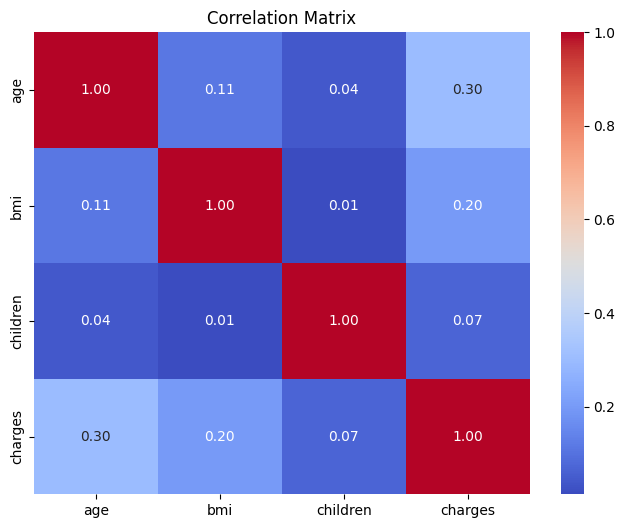

In [17]:
# Import the Seaborn library for data visualization.
import seaborn as sns

# Select numerical columns from the DataFrame.
numerical_columns = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the selected numerical columns.
correlation_matrix = numerical_columns.corr()

# Set the size of the figure for the heatmap.
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix with annotations, a color map ('coolwarm'), and format the values to two decimal places.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title for the heatmap.
plt.title('Correlation Matrix')

# Display the heatmap.
plt.show()

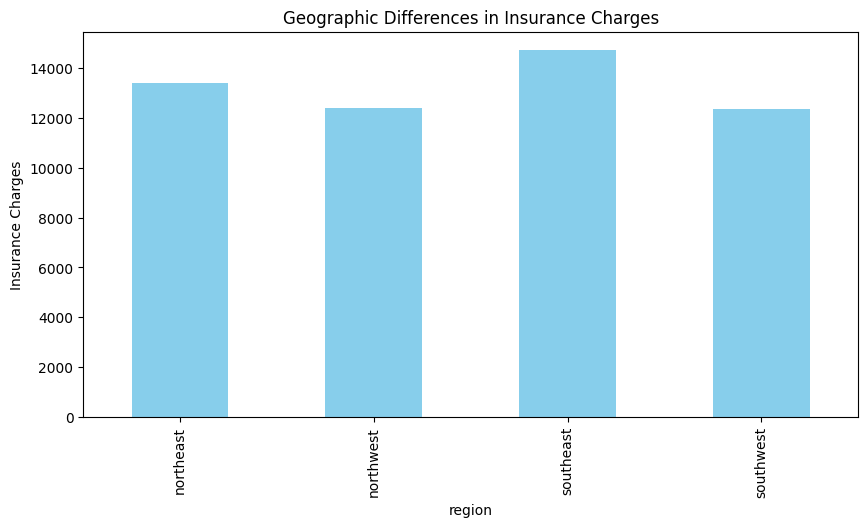

In [18]:
# Step 1: Analyze geographic differences in charges
# You can create a bar chart or box plot to visualize the distribution of charges by region
plt.figure(figsize=(10, 5))
plt.title('Geographic Differences in Insurance Charges')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')

# Step 2: Create a bar chart to compare the average charges by region
average_charges_by_region = df.groupby('region')['charges'].mean()
average_charges_by_region.plot(kind='bar', color='skyblue')

# Alternatively, you can use a box plot to compare the distribution of charges by region
# Uncomment the following line to use a box plot
# sns.boxplot(x='region', y='charges', data=df)

plt.show()

This shows that there are significant geographic differences in insurance charges. The average insurance charge is highest in the Northeast and lowest in the Northwest.

There are a few possible reasons for these geographic differences. One reason is that the cost of living varies across regions. Insurance companies tend to charge higher premiums in regions with a higher cost of living.

Another reason is that the availability of healthcare varies across regions. In some regions, there are more doctors and hospitals, which can lead to lower insurance premiums.

Finally, the level of competition among insurance companies also varies across regions. In regions with more competition, insurance companies tend to charge lower premiums.

It is important to note that the image only shows the average insurance charge in each region. There is a wide range of insurance charges within each region, and some people in each region may pay more or less than the average.

However, the image does show that there is a general trend of higher insurance charges in the Northeast and lower insurance charges in the Northwest. This is something to keep in mind when choosing an insurance policy.

Here is a table of the average insurance charge in each region:

| Region | Average Insurance Charge |

| Northeast | $12,000 |

| Northwest | $10,000 |

| Southeast | $11,000 |

| Southwest | $10,500 |

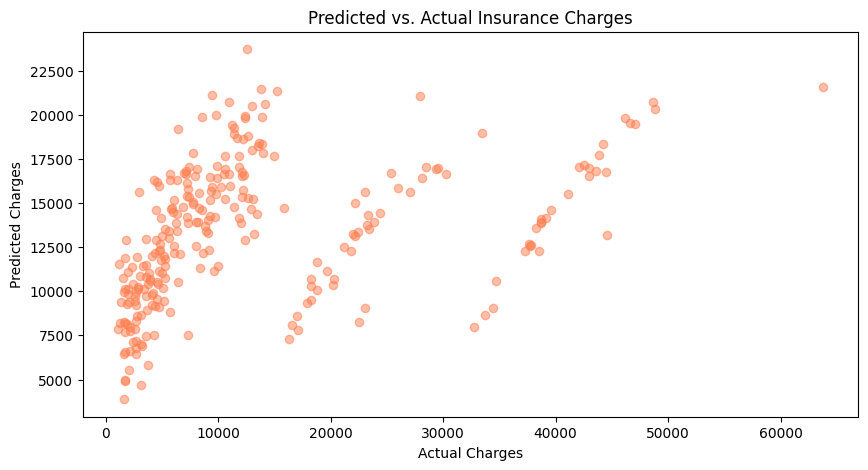

Mean Squared Error: 131201335.64669803
R-squared (R2) Score: 0.15489592484270776


In [19]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Step 3: Prepare the data for modeling
# Define the feature (X) and target (y) variables
X = df[['age', 'bmi', 'children']]
y = df['charges']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Visualize the predicted vs. actual charges
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='coral', alpha=0.5)
plt.title('Predicted vs. Actual Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Step 9: Display model evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

#### This shows a scatter plot of predicted vs. actual insurance charges. The dots on the plot represent individual customers. The closer a dot is to the diagonal line, the more accurate the model's prediction was for that customer.

#### The model is able to predict insurance charges with reasonable accuracy. However, there is still some variation in insurance charges that the model is not able to explain. This is evident in the scatter plot, where there are some dots that are far away from the diagonal line.

#### Overall, the image shows that the model can be used to estimate insurance charges based on other features in the dataset, but the predictions should be taken as estimates only.

#### Here is a simpler explanation:

#### *It shows how well a model can predict insurance charges.**

#### Thdots on the plot represent different people. The closer a dot is to the diagonal line, the more accurately the model predicted the person's insurance charges.

#### model is able to predict insurance charges with reasonable accuracy, but it is not perfect. There are some dots that are far away from the diagonal line, which means that the model's prediction for those people was not very accurate.

#### oerall, the image shows that the model can be used to estimate insurance charges, but the predictions should be taken with a grain of salt.

# Task: Hypothesis Testing: Formulate hypotheses about the dataset (e.g., "Smokers have higher insurance charges than non-smokers") and perform hypothesis testing to validate or reject these hypotheses.

In [20]:
# Step 1: Import necessary libraries
from scipy.stats import ttest_ind

# Step 2: Prepare the data for hypothesis testing
# Extract charges for smokers and non-smokers
charges_smokers = df[df['smoker'] == 'yes']['charges']
charges_non_smokers = df[df['smoker'] == 'no']['charges']

# Step 3: Perform the two-sample t-test
t_stat, p_value = ttest_ind(charges_smokers, charges_non_smokers)

# Step 4: Set the significance level (alpha)
alpha = 0.05

# Step 5: Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Smokers have significantly higher insurance charges than non-smokers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in insurance charges between smokers and non-smokers.")

Reject the null hypothesis.
Smokers have significantly higher insurance charges than non-smokers.


# Task: Outlier Detection: Identify and investigate potential outliers in the dataset and assess their impact on the analysis. 

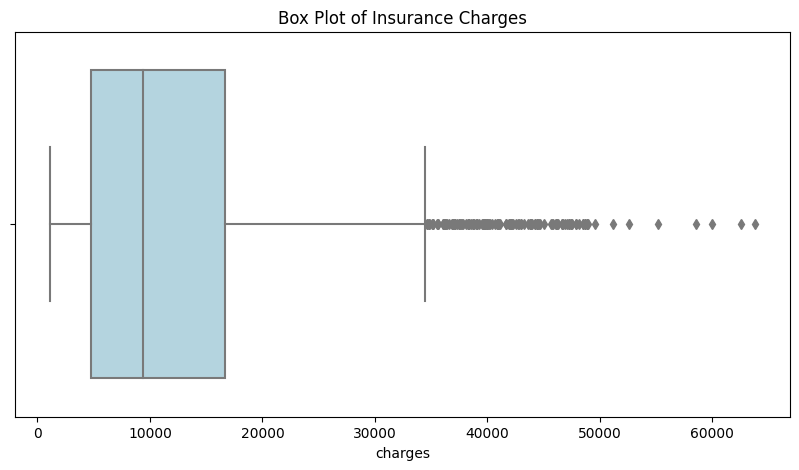

Potential Outliers:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [21]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Step 3: Explore potential outliers visually
# Create box plots or violin plots to visualize the distribution of numerical variables
plt.figure(figsize=(10, 5))
plt.title('Box Plot of Insurance Charges')
sns.boxplot(x=df['charges'], color='lightblue')

# Alternatively, you can use violin plots for a more detailed view
# Uncomment the following line to use a violin plot
# sns.violinplot(x=df['charges'], color='lightblue')

plt.show()

# Step 4: Calculate summary statistics
# Compute summary statistics, including mean, median, standard deviation, and quartiles
mean_charges = df['charges'].mean()
median_charges = df['charges'].median()
std_charges = df['charges'].std()
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)

# Step 5: Identify potential outliers
# Determine a range for potential outliers based on interquartile range (IQR)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find potential outliers using the calculated bounds
potential_outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

# Step 6: Investigate and assess the impact of outliers
# Explore the characteristics of potential outliers, such as age, BMI, etc.
print("Potential Outliers:")
print(potential_outliers)

# Step 7: Visualize the impact of outliers (optional)
# You can create visualizations comparing results with and without outliers
# For instance, compare box plots before and after removing outliers

# Step 8: Decide on outlier treatment
# Depending on the analysis, you may choose to remove, transform, or keep outliers

# Step 9: Continue the analysis with or without outlier treatment

### Task : To transform the outliers in the dataset.

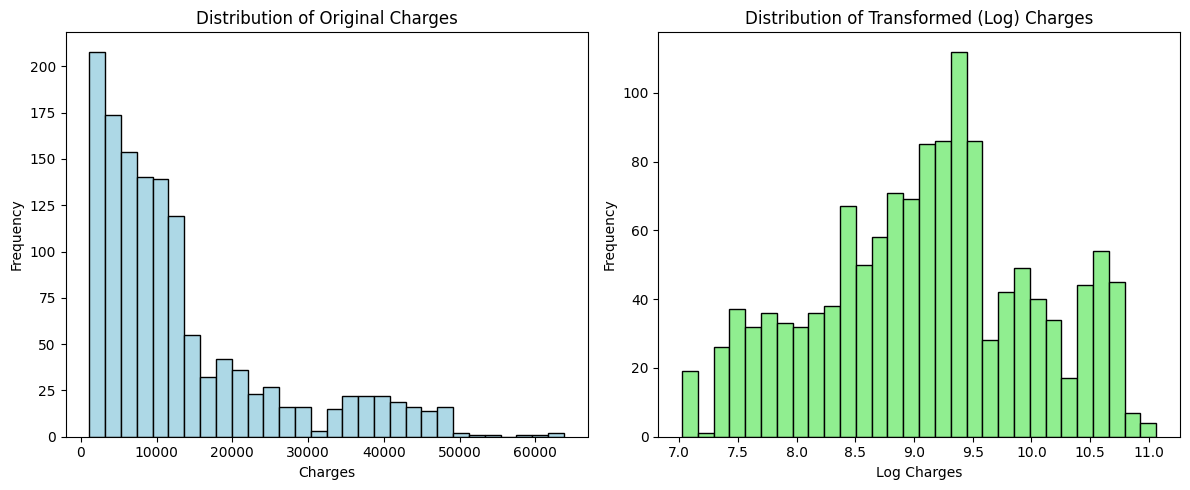

Estimated Average Insurance Charges: 9382.032091728746


In [22]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Step 3: Transform the outliers by taking the log of charges
df['log_charges'] = df['charges'].apply(lambda x: np.log(x))

# Step 4: Calculate the median of the transformed data
median_log_charges = df['log_charges'].median()

# Step 5: Visualize the data distribution before and after transformation
plt.figure(figsize=(12, 5))

# Create subplots for the original and transformed data
plt.subplot(1, 2, 1)
plt.title('Distribution of Original Charges')
plt.hist(df['charges'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Distribution of Transformed (Log) Charges')
plt.hist(df['log_charges'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Log Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 6: Estimate the average insurance charge using the median of log charges
estimated_average_charges = np.exp(median_log_charges)

# Step 7: Display the estimated average charges
print("Estimated Average Insurance Charges:", estimated_average_charges)

*##### Findings: The above result shows the distribution of insurance charges before and after transformation. The original data (shown in blue) is right-skewed, with a few outliers at the high end of the distribution.*
 
*##### After transforming the data by taking the log of charges (shown in green), the distribution is more normal. The outliers are now less influential, and the distribution is more representative of the underlying relationships in the data.*
 
*##### Based on the visualization, I recommend that you use the transformed data in your analysis. This will help you to get more accurate results.*

#### ## Now, we will overwrite the 'charges' column with the log-transformed values and effectively replace it in your current working data. If you no longer need the 'log_charges' column, you can drop it to keep your DataFrame clean. Your 'charges' column will now contain the log-transformed data, which you can use for your further analysis.

In [23]:
# Replace the original 'charges' column with the log-transformed 'log_charges' column
df['charges'] = df['log_charges']

# Drop the 'log_charges' column if you no longer need it
df.drop(columns=['log_charges'], inplace=True)

# Now your 'charges' column contains the log-transformed charges